### Test ClusterMap pipeline

In [1]:
from ClusterMap.clustermap import *
import tifffile
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spots = pd.read_csv('D:/ClusterMap_Data/CNS-OB/spots_filtered_data/tile_6_3D_spot_meta.csv')
spots = spots.loc[(spots['spot_location_1']<300) &(spots['spot_location_2']<300)]
dapi = tifffile.imread('D:/ClusterMap_Data/CNS-OB/dapi/20210216-Well01-OB-SeqA1-DAPI_20210216-Well01-OB-SeqA1-DAPI_Tile 6_cmle_ch04.tif')
dapi = np.transpose(dapi, (1,2,0))

dapi = dapi[:300, :300,:]
model = ClusterMap(spots=spots, dapi=dapi, gene_list=np.arange(1,1023), num_dims=3)


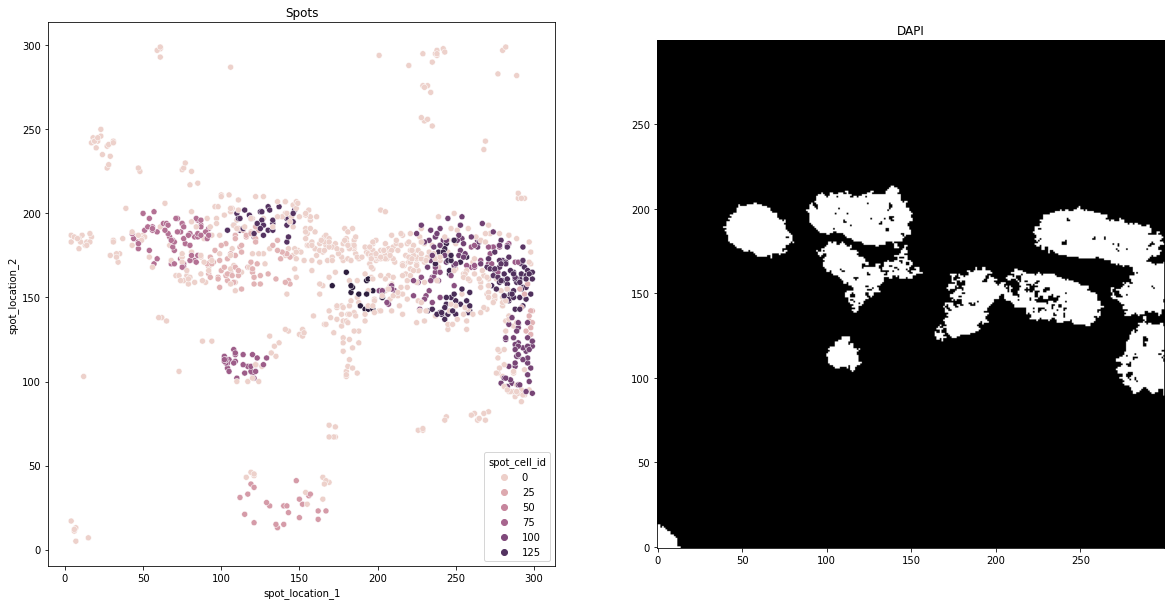

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x='spot_location_1', y='spot_location_2', data=model.spots, hue='spot_cell_id')
plt.title('Spots')

plt.subplot(1,2,2)
plt.imshow(model.dapi_binary[:,:,22], origin='lower', cmap='binary_r')
plt.title('DAPI')
plt.show()

In [4]:
%%time
model.segmentation(50,50, add_dapi=False)

Computing NGC coordinates
DPC
Wall time: 8min 39s


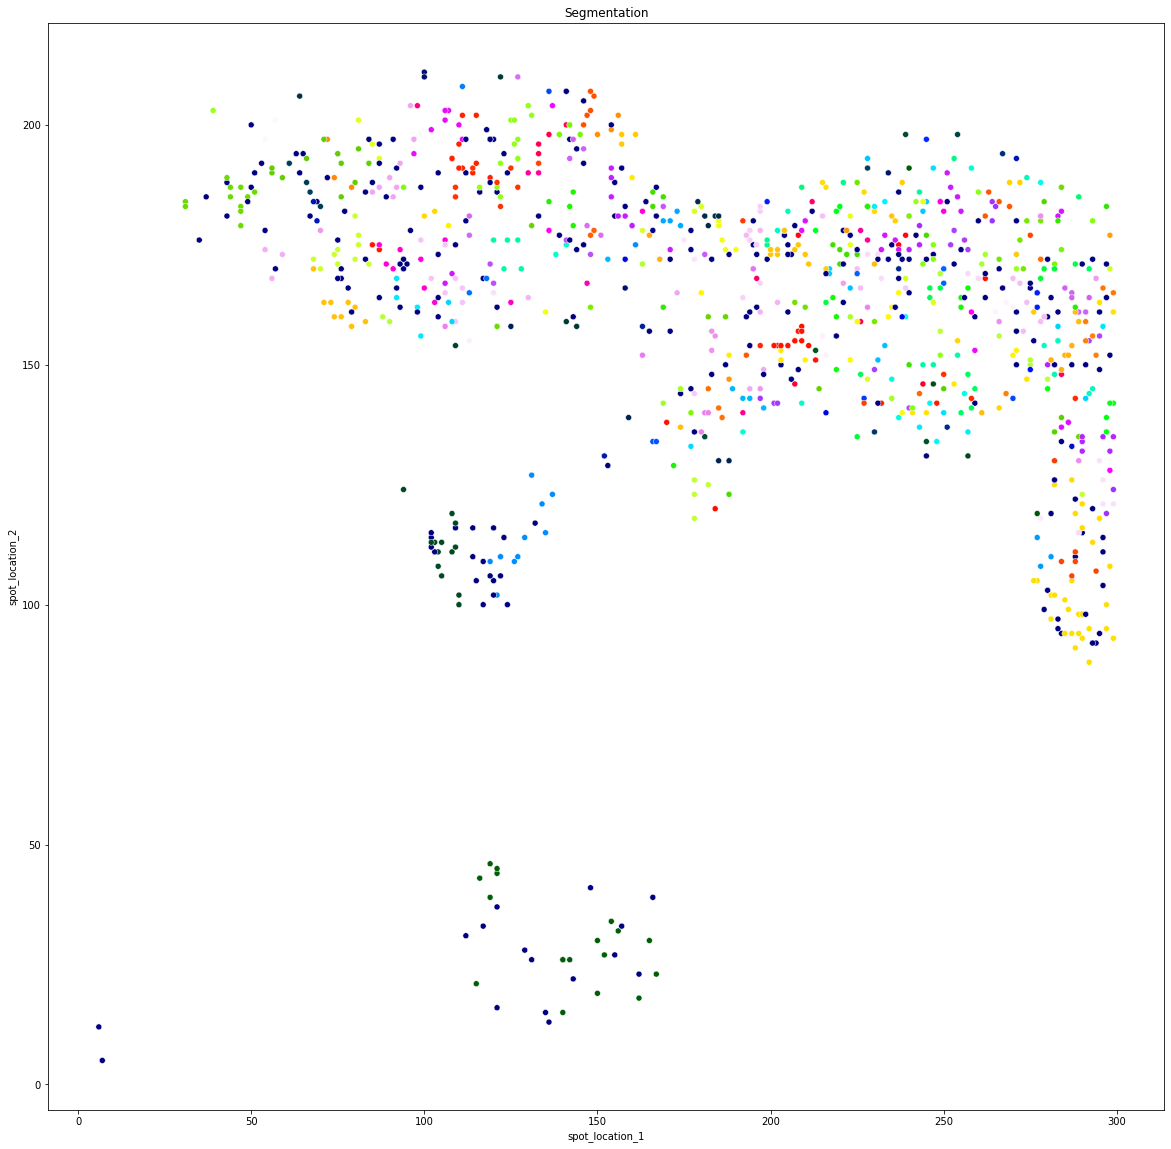

In [5]:
model.plot_segmentation()

In [25]:
spots = pd.read_csv('D:/ClusterMap_Data/CNS-OB/spots_filtered_data/tile_6_3D_spot_meta.csv')
spots = spots.loc[(spots['spot_location_1']<=200) &(spots['spot_location_2']<=200)]
spots_denoised = spots.loc[spots['is_noise']==0, :].copy()
spots_denoised.reset_index(inplace=True)
spots_denoised.head()

,index,spot_location_1,spot_location_2,spot_location_3,spot_image_position,spot_cell_id,gene,is_noise
0,11,148,41,1,tile_6,34,613,0
1,103,89,185,3,tile_6,-2,845,0
2,155,131,179,4,tile_6,-2,572,0
3,346,61,192,6,tile_6,-2,339,0
4,471,138,173,7,tile_6,19,845,0


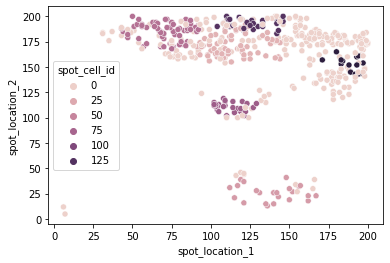

In [33]:
sns.scatterplot(x='spot_location_1', y='spot_location_2', data=spots_denoised, hue='spot_cell_id')
plt.show()

In [3]:
%%time
gene_list = np.arange(1,1023)
radius = 100
num_dim = 3
ngc = NGC(spots_denoised, radius, num_dim, gene_list)

Wall time: 7.7 s


In [4]:
dapi = tifffile.imread('D:/ClusterMap_Data/CNS-OB/dapi/20210216-Well01-OB-SeqA1-DAPI_20210216-Well01-OB-SeqA1-DAPI_Tile 6_cmle_ch04.tif')
dapi = np.transpose(dapi, (1,2,0))
dapi_binary, dapi_stacked = binarize_dapi(dapi)

In [5]:
%%time
all_spatial, all_ngc = add_dapi_points(dapi_binary, spots_denoised, ngc, num_dim)

Wall time: 5.79 s


In [6]:
ngc.shape, all_ngc.shape

((10573, 1022), (32474, 1022))

In [19]:
%%time
cell_ids = DPC(all_spatial[:200,:], all_ngc[:200,:], 50, 50)

Wall time: 22 s


In [20]:
cell_ids

array([ 92.,   0.,  12.,  33.,   0.,  81.,   0.,   0.,  60.,  63.,  82.,
        81.,  21.,  26.,  11.,  80.,  35.,  35.,   0.,  46.,  70.,   0.,
         0.,  50.,   0.,   0.,  50.,   6.,   6.,  13.,   0.,  67.,   0.,
         0.,  31.,  34.,  73.,   0.,  95.,  49.,  78.,  48.,   0.,   0.,
        49.,   0.,   0.,  16.,  36.,   0.,  62.,   0.,  65.,  81.,  81.,
         0.,  93.,  59.,   0.,  72.,  39.,  38.,  23.,  99.,  89.,  83.,
         0.,  14.,  75.,  50.,   0.,   0.,   0.,   0.,   0.,  41.,   4.,
         0.,  34.,   0.,  64.,  85.,  45.,  49.,  32.,  24.,  82.,   0.,
        81.,  69.,  52.,  57.,  11.,  19.,   1.,  77.,  28.,  79.,  35.,
        17.,  46.,   0.,  97.,   8.,   8.,   0.,   0.,  75.,   0.,  84.,
        67.,   0.,  84.,  68.,  25.,   0.,   0.,   0.,  88.,   0.,  29.,
        29., 100.,   0.,  92.,  92.,  92.,   0.,   0.,  60.,  18.,   0.,
         0.,  91.,  11.,  58.,   5.,  51.,  22.,  14.,   0.,  20.,  61.,
        96.,  96.,  74.,  40.,  15.,  90.,  98.,  9